<title>Unfinished Automatic Crossword Solver Project</title>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import collections
import numpy as np
from scipy import stats

In [2]:
sort = lambda counter: sorted([(counter[key], key) for key in counter], reverse=True)

In [3]:
df = pd.read_csv('data\\xword.csv')
df['Clue'] = df['Clue'].astype(str)
df['Answer'] = df['Answer'].astype(str)
df['ClueLength'] = df['Clue'].apply(lambda x: len(x))

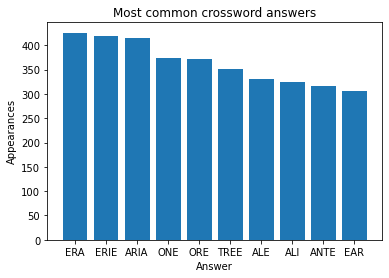

In [4]:
answers = sort(collections.Counter(list(df["Answer"])))
    
answers_count = [item[0] for item in answers]
answers_words = [item[1] for item in answers]
plt.figure()
plt.bar(answers_words[:10], answers_count[:10])
plt.xlabel('Answer')
plt.ylabel('Appearances')
plt.title('Most common crossword answers')
plt.show()

In [5]:
all_text = list(''.join(list(df['Answer'])).lower() + ''.join(list(df['Clue'])).lower())
all_counter = sort(collections.Counter(all_text))
for word_tuple in all_counter:
    print(f'Character: "{word_tuple[1]}". Appearances: {word_tuple[0]}')

Character: "e". Appearances: 1794408
Character: " ". Appearances: 1643160
Character: "a". Appearances: 1409014
Character: "o". Appearances: 1202690
Character: "s". Appearances: 1162314
Character: "r". Appearances: 1153868
Character: "t". Appearances: 1123249
Character: "i". Appearances: 1055864
Character: "n". Appearances: 1019886
Character: "l". Appearances: 740853
Character: "c". Appearances: 520036
Character: "d". Appearances: 516441
Character: "h". Appearances: 475808
Character: "m". Appearances: 439277
Character: "p". Appearances: 398262
Character: "u". Appearances: 380875
Character: "g". Appearances: 346365
Character: "f". Appearances: 318521
Character: "b". Appearances: 291797
Character: "y". Appearances: 255340
Character: "w". Appearances: 221204
Character: "_". Appearances: 167566
Character: "k". Appearances: 167123
Character: "v". Appearances: 139878
Character: """. Appearances: 138773
Character: ".". Appearances: 118300
Character: ",". Appearances: 86473
Character: "'". Appe

In [6]:
#remove outliers
df = df[(np.abs(stats.zscore(df['Length'])) < 3)]
df = df[(np.abs(stats.zscore(df['ClueLength'])) < 3)]

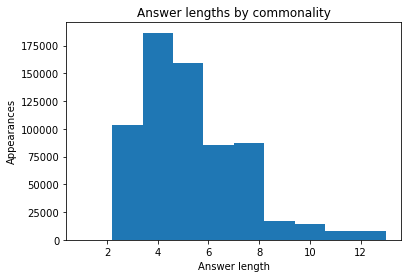

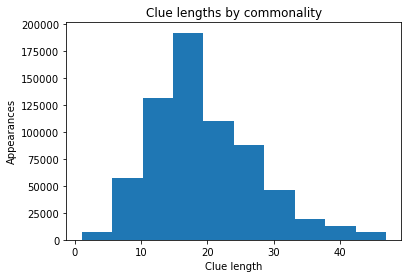

In [7]:
plt.figure()
plt.hist(list(df['Length']))
plt.xlabel('Answer length')
plt.ylabel('Appearances')
plt.title('Answer lengths by commonality')
plt.show()
plt.figure()
plt.hist(list(df['ClueLength']))
plt.xlabel('Clue length')
plt.ylabel('Appearances')
plt.title('Clue lengths by commonality')
plt.show()

An evaluation of the initial training of the model was done and can be found in the directory '.\v1_model' in the file 'evaluate.ipynb'. This model performed very poorly, and I will be now attempting to finetune a pretrained character model for an attempt at better performance.